<a href="https://colab.research.google.com/github/seyed-mohammadreza-mousavi/ml-playground-starter/blob/main/01-linear-regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Linear Regression from Scratch & Scikit-learn

Linear Regression is a **fundamental supervised learning algorithm** used for regression tasks.  
It assumes a **linear relationship** between input feature(s) $X$ and output $y$.  

The hypothesis (model) is:

$$
\hat{y} = w x + b
$$

where:  
- $w$ = weight (slope)  
- $b$ = bias (intercept)  
- $\hat{y}$ = predicted value


## 2. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Generate synthetic dataset

## 1. Generate Synthetic Dataset  

We create a dataset with a linear trend plus random noise:  

$$
y = 4 + 3x + \epsilon
$$

where $\epsilon$ is Gaussian noise.


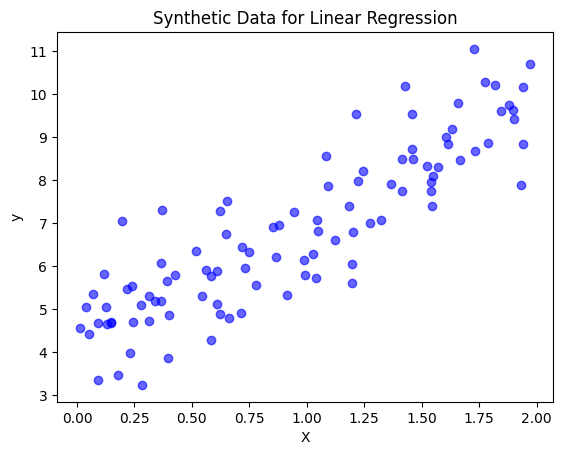

In [2]:
np.random.seed(42)

# features
X = 2 * np.random.rand(100, 1)
# target with noise
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y, color="blue", alpha=0.6)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data for Linear Regression")
plt.show()

## 4. Linear Regression from Scratch (Gradient Descent)

## 2. Cost Function  

We want to find $w, b$ that minimize the error between predictions and actual values.  
The **Mean Squared Error (MSE)** is used:

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^{n} \Big(y_i - (w x_i + b)\Big)^2
$$

## 3. Gradient Descent  

To minimize $J(w, b)$, we update the parameters iteratively:  

$$
w := w - \alpha \frac{\partial J}{\partial w}, \quad
b := b - \alpha \frac{\partial J}{\partial b}
$$  

where $\alpha$ is the learning rate.  

---

### Gradients  

The cost function is:  

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w x_i + b))^2
$$  

The partial derivatives are:  

$$
\frac{\partial J}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} x_i \Big(y_i - (w x_i + b)\Big)
$$  

$$
\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \Big(y_i - (w x_i + b)\Big)
$$


In [3]:
# Initialize parameters
w = 0.0
b = 0.0
lr = 0.1          # learning rate
epochs = 1000     # number of iterations
n = len(X)

# Training with gradient descent
for epoch in range(epochs):
    y_pred = w * X + b
    dw = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    w -= lr * dw
    b -= lr * db

print(f"Learned parameters: w = {w:.2f}, b = {b:.2f}")

Learned parameters: w = 2.77, b = 4.22


## 5. Plot the learned regression line

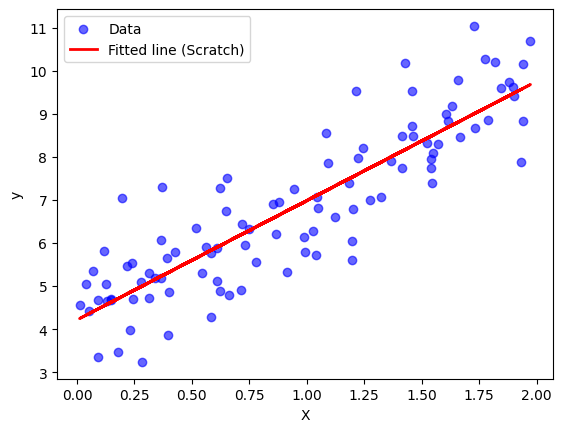

In [4]:
plt.scatter(X, y, color="blue", alpha=0.6, label="Data")
plt.plot(X, w * X + b, color="red", linewidth=2, label="Fitted line (Scratch)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## 6. Linear Regression with scikit-learn

In [5]:
model = LinearRegression()
model.fit(X, y)

print(f"Scikit-learn parameters: w = {model.coef_[0][0]:.2f}, b = {model.intercept_[0]:.2f}")

Scikit-learn parameters: w = 2.77, b = 4.22


## 7. Plot sklearn result

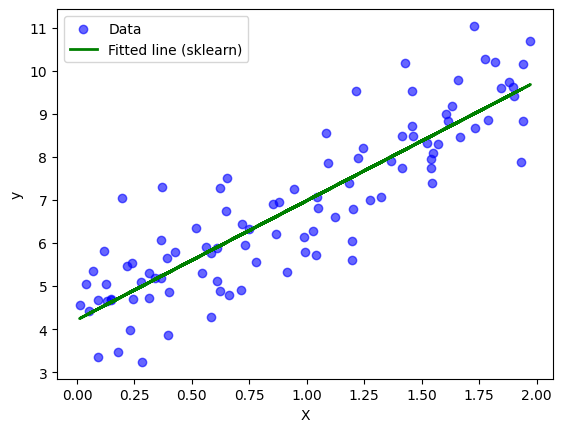

In [6]:
plt.scatter(X, y, color="blue", alpha=0.6, label="Data")
plt.plot(X, model.predict(X), color="green", linewidth=2, label="Fitted line (sklearn)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## 8. Predictions

Predictions for X_new: [[4.21509616]
 [9.75532293]]


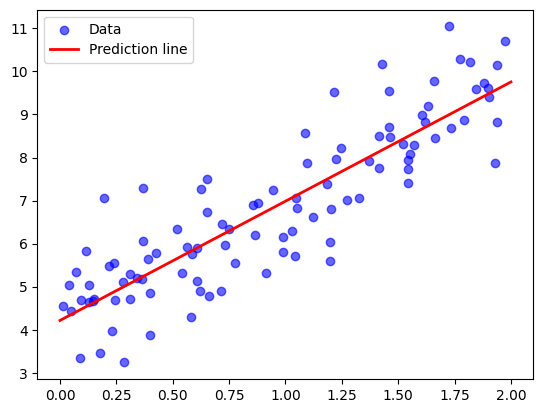

In [7]:
X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

print("Predictions for X_new:", y_pred)

plt.scatter(X, y, color="blue", alpha=0.6, label="Data")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Prediction line")
plt.legend()
plt.show()